In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from tabulate import tabulate

In [2]:
receiver=pd.read_csv("C:\\Users\\DELLL\\Documents\\data_analysis\\electroral_bonds_receiver_data.csv\\electroral_bonds_receiver_data.csv")
buyer=pd.read_csv("C:\\Users\\DELLL\\Documents\\data_analysis\\electroral_bonds_buyer_data.csv")

In [3]:
print(receiver.head(5))

   Unnamed: 0 Date of\nEncashment               Name of the Political Party  \
0           0         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
1           1         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
2           2         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
3           3         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
4           4         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   

   Denomination  
0       1000000  
1       1000000  
2      10000000  
3       1000000  
4       1000000  


In [39]:
print(buyers.head(4))

   Year                                  Purchaser Name  Denomination
0  2019                             A B C INDIA LIMITED       4000000
1  2019                                  ABHISHEK RATHI        400000
2  2019           ACE COMERCIAL COMPANY PRIVATE LIMITED       2500000
3  2019  ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED       2500000


In [5]:
receiver['Date of Encashment'] = pd.to_datetime(receiver['Date of\nEncashment'], format='%d/%b/%Y')#change the formate of date
receiver['Formatted Date'] = receiver['Date of Encashment'].dt.strftime('%Y-%m-%d')
receiver['Year'] = receiver['Date of Encashment'].dt.year# creating a new year columns for year
receiver = receiver.groupby(['Year', 'Name of the Political Party'])['Denomination'].sum().reset_index()#here we group year and politica party name according that we sum Denomination

In [ ]:
buyer = buyer.rename(columns={' Denomination ':"Donor"})

buyer = buyer.rename(columns={'Date of Purchase':"Date"})

buyer=buyer.drop(columns=["Unnamed: 4","Unnamed: 5"])

In [ ]:
buyer['Date'] = pd.to_datetime(buyer['Date'], format='%d-%b-%y') #change the formate of date
buyer['Year'] = buyer['Date'].dt.year # creating a new year columns for year
buyers = buyer.groupby(['Year', 'Purchaser Name'])['Denomination'].sum().reset_index() #here we group year and purchase name according that we sum Denomination

In [16]:
print(buyers.count())

Year              1589
Purchaser Name    1589
Denomination      1589
dtype: int64


In [17]:
print(tabulate(receiver, headers='keys', tablefmt='pretty'))

+----+------+------------------------------------------------+--------------+
|    | Year |          Name of the Political Party           | Denomination |
+----+------+------------------------------------------------+--------------+
| 0  | 2019 |                AAM AADMI PARTY                 |   22000000   |
| 1  | 2019 |            ADYAKSHA SAMAJVADI PARTY            |  108400000   |
| 2  | 2019 |    ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM    |   60500000   |
| 3  | 2019 |          ALL INDIA TRINAMOOL CONGRESS          |  870946000   |
| 4  | 2019 |             BHARAT RASHTRA SAMITHI             |  371529000   |
| 5  | 2019 |              BHARTIYA JANTA PARTY              | 19717501000  |
| 6  | 2019 |        BIHAR PRADESH JANTA DAL(UNITED)         |   30000000   |
| 7  | 2019 |                BIJU JANATA DAL                 |  100000000   |
| 8  | 2019 |            DMK PARTY IN PARLIAMENT             |   90000000   |
| 9  | 2019 |     JAMMU AND KASHMIR NATIONAL CONFERENCE      |  

In [55]:
print("The no of Political Party =",receiver['Name of the Political Party'].nunique())
print("The no of Companies=",buyers['Purchaser Name'].nunique())

The no of Political Party = 27
The no of Companies= 1316


In [19]:
print(tabulate(buyers, headers='keys', tablefmt='pretty'))


+------+------+---------------------------------------------------------------+--------------+
|      | Year |                        Purchaser Name                         | Denomination |
+------+------+---------------------------------------------------------------+--------------+
|  0   | 2019 |                      A B C INDIA LIMITED                      |   4000000    |
|  1   | 2019 |                        ABHISHEK RATHI                         |    400000    |
|  2   | 2019 |             ACE COMERCIAL COMPANY PRIVATE LIMITED             |   2500000    |
|  3   | 2019 |        ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED         |   2500000    |
|  4   | 2019 |                    ADIT BUILD WELL PVT LTD                    |   10000000   |
|  5   | 2019 |                       AIS DISTRIBUTION                        |   25000000   |
|  6   | 2019 |            AISHWARYA BUSINESS CORPORATION PVT, LTD            |   50000000   |
|  7   | 2019 |                      ALLANA COLD S

In [20]:
receiver_total_money = receiver.groupby(['Name of the Political Party'])['Denomination'].sum().reset_index()

In [21]:
print(tabulate(receiver_total_money, headers='keys', tablefmt='pretty'))

+----+------------------------------------------------+--------------+
|    |          Name of the Political Party           | Denomination |
+----+------------------------------------------------+--------------+
| 0  |                AAM AADMI PARTY                 |  654500000   |
| 1  |            ADYAKSHA SAMAJVADI PARTY            |  140500000   |
| 2  |    ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM    |   60500000   |
| 3  |          ALL INDIA TRINAMOOL CONGRESS          | 16095314000  |
| 4  |             BHARAT RASHTRA SAMITHI             | 12147099000  |
| 5  |              BHARTIYA JANTA PARTY              | 60605111000  |
| 6  |        BIHAR PRADESH JANTA DAL(UNITED)         |  140000000   |
| 7  |                BIJU JANATA DAL                 |  7755000000  |
| 8  |            DMK PARTY IN PARLIAMENT             |  6390000000  |
| 9  |               GOA FORWARD PARTY                |   3500000    |
| 10 |     JAMMU AND KASHMIR NATIONAL CONFERENCE      |   5000000    |
| 11 |

In [22]:
buyers_total = buyer.groupby(['Purchaser Name'])['Denomination'].sum().reset_index()

In [23]:
print(tabulate(buyers_total, headers='keys', tablefmt='pretty'))

+------+---------------------------------------------------------------+--------------+
|      |                        Purchaser Name                         | Denomination |
+------+---------------------------------------------------------------+--------------+
|  0   |                       14 REELS PLUS LLP                       |   10000000   |
|  1   |                      A B C INDIA LIMITED                      |   4000000    |
|  2   |                       AAKANKSHA BAHETY                        |   1000000    |
|  3   |                     AALAYA CONSTRUCTIONS                      |   10000000   |
|  4   |              AARISH SOLAR POWER PRIVATE LIMITED               |   20000000   |
|  5   |                AASHMAN ENERGY PRIVATE LIMITED                 |   10000000   |
|  6   |                    AASHMAN ENERGY PVT LTD                     |   20000000   |
|  7   |               AAYTEE LOGISTICS PRIVATE LIMITED                |   3000000    |
|  8   |                        

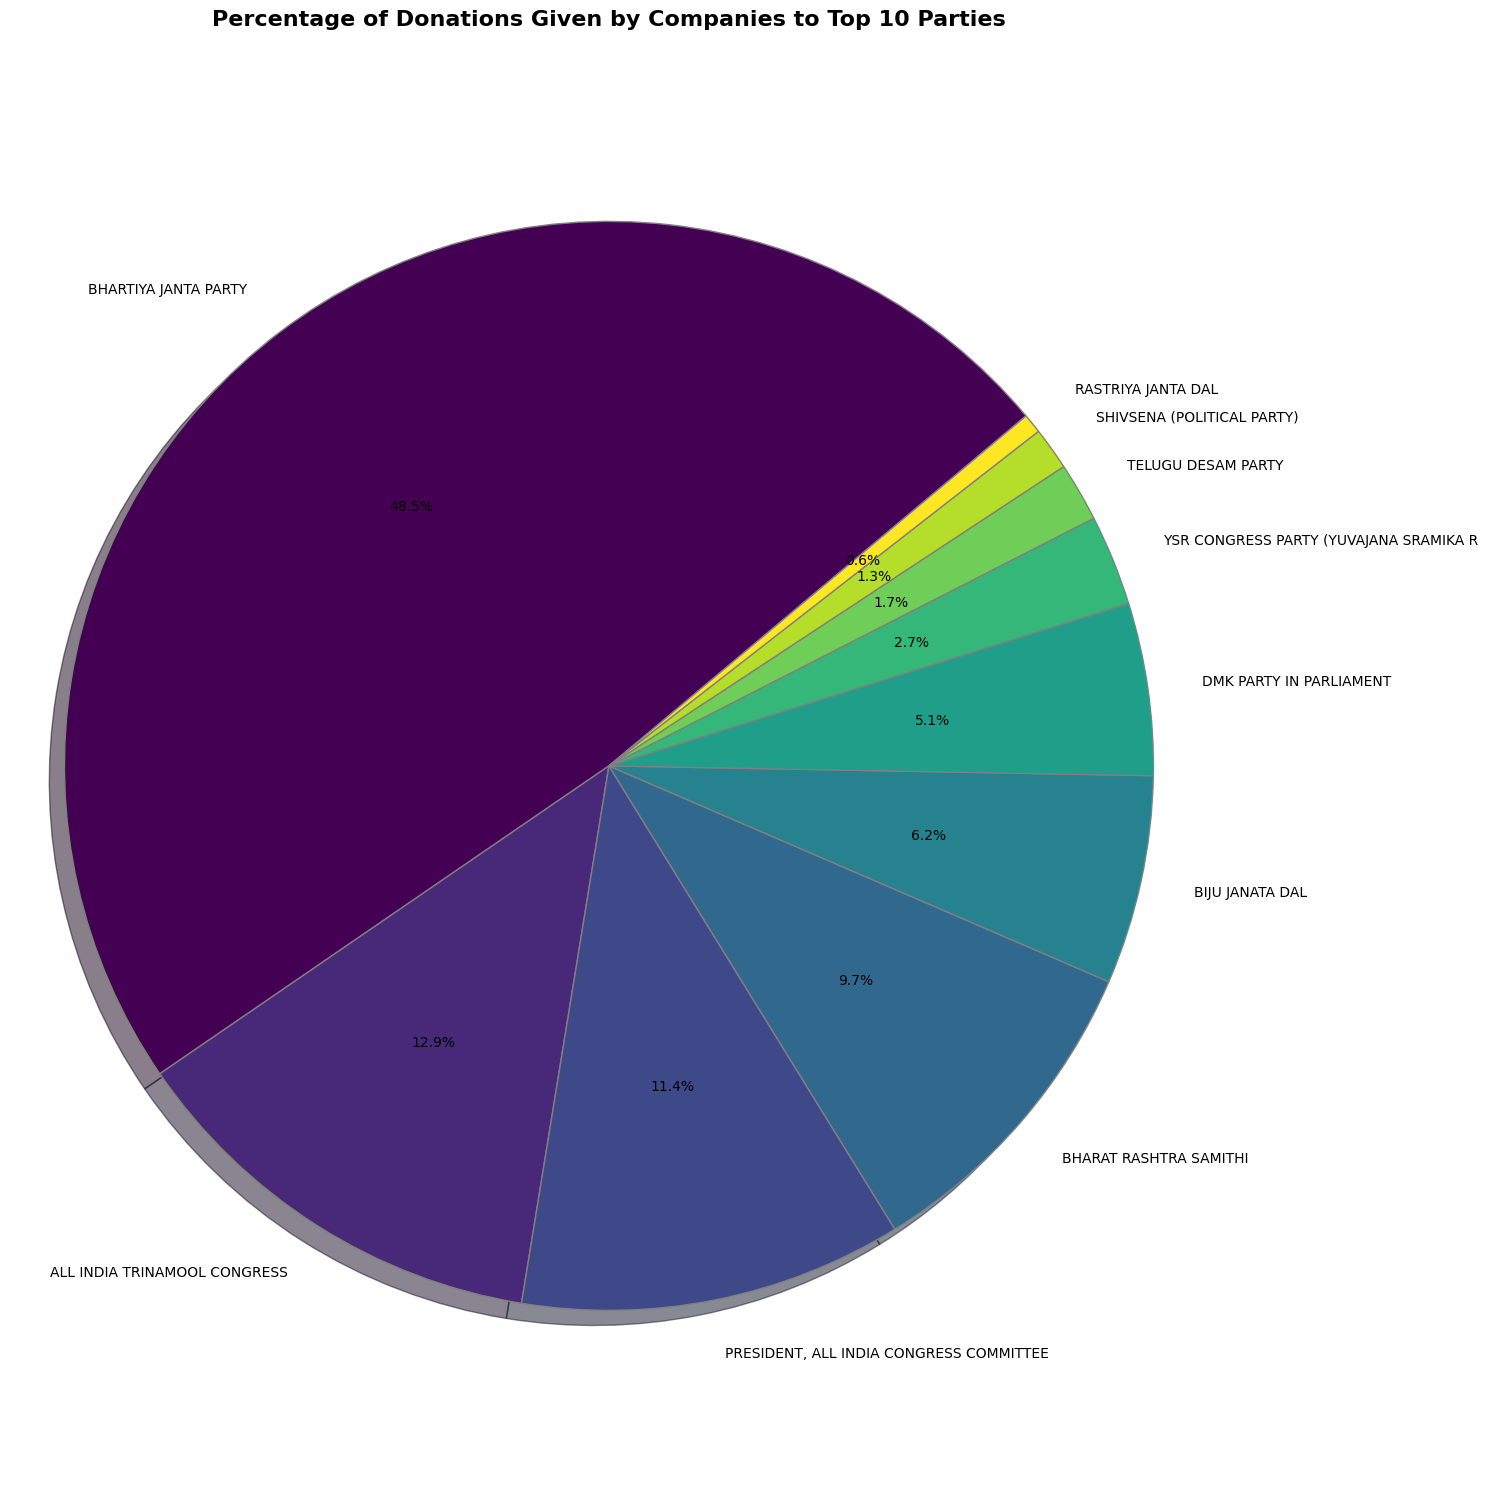

In [38]:
party_funds = receiver_total_money.groupby('Name of the Political Party')['Denomination'].sum().reset_index()

total_amount_received = party_funds['Denomination'].sum()

party_funds['Percentage'] = (party_funds['Denomination'] / total_amount_received) * 100

party_funds = party_funds.sort_values(by = 'Percentage', ascending = False)

plt.figure(figsize=(15, 15))
party_pie = party_funds.head(10)

# Defining colors for the pie chart
colors = plt.cm.viridis(np.linspace(0, 1, len(party_pie)))

# Plotting the pie chart
plt.pie(party_pie['Denomination'], labels=party_pie['Name of the Political Party'], autopct='%1.1f%%', startangle=40, 
        labeldistance=1.1, colors=colors, shadow=True, wedgeprops={'edgecolor': 'grey'})

# Adding a title with enhanced formatting
plt.title('Percentage of Donations Given by Companies to Top 10 Parties', fontsize=16, fontweight='bold', pad=20)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
year_part_funds= buyers.groupby('Year')['Denomination'].sum().reset_index()
year_part_funds['Denomination'] = year_part_funds['Denomination']/10000000

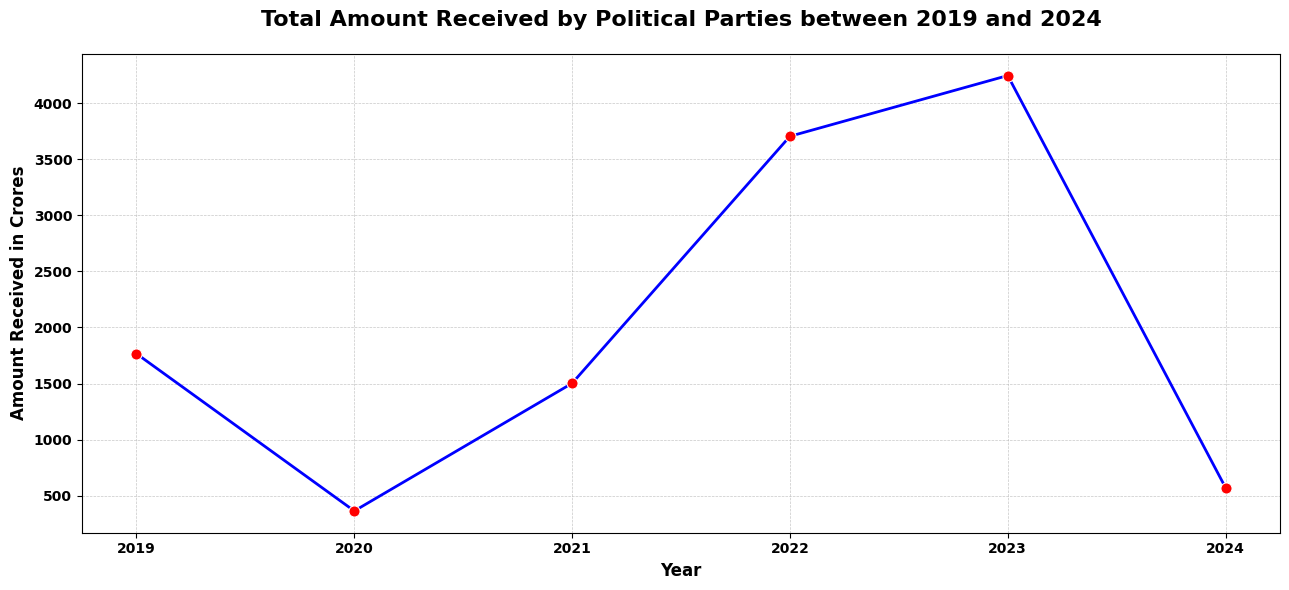

In [26]:
# Assuming 'year_part_funds' DataFrame is already defined and has columns 'Year' and 'Denomination'

plt.figure(figsize=(13, 6))

# Title with enhanced formatting
plt.title('Total Amount Received by Political Parties between 2019 and 2024', fontsize=16, fontweight='bold', pad=20)

# Line plot with improved styling
sn.lineplot(x='Year', y='Denomination', data=year_part_funds, marker='o', linewidth=2, markersize=8, color='b', linestyle='-', markerfacecolor='r')

# Axis labels with enhanced formatting
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Amount Received in Crores', fontsize=12, fontweight='bold')

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adding tick parameters
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Tight layout to fit everything neatly
plt.tight_layout()

# Show the plot
plt.show()

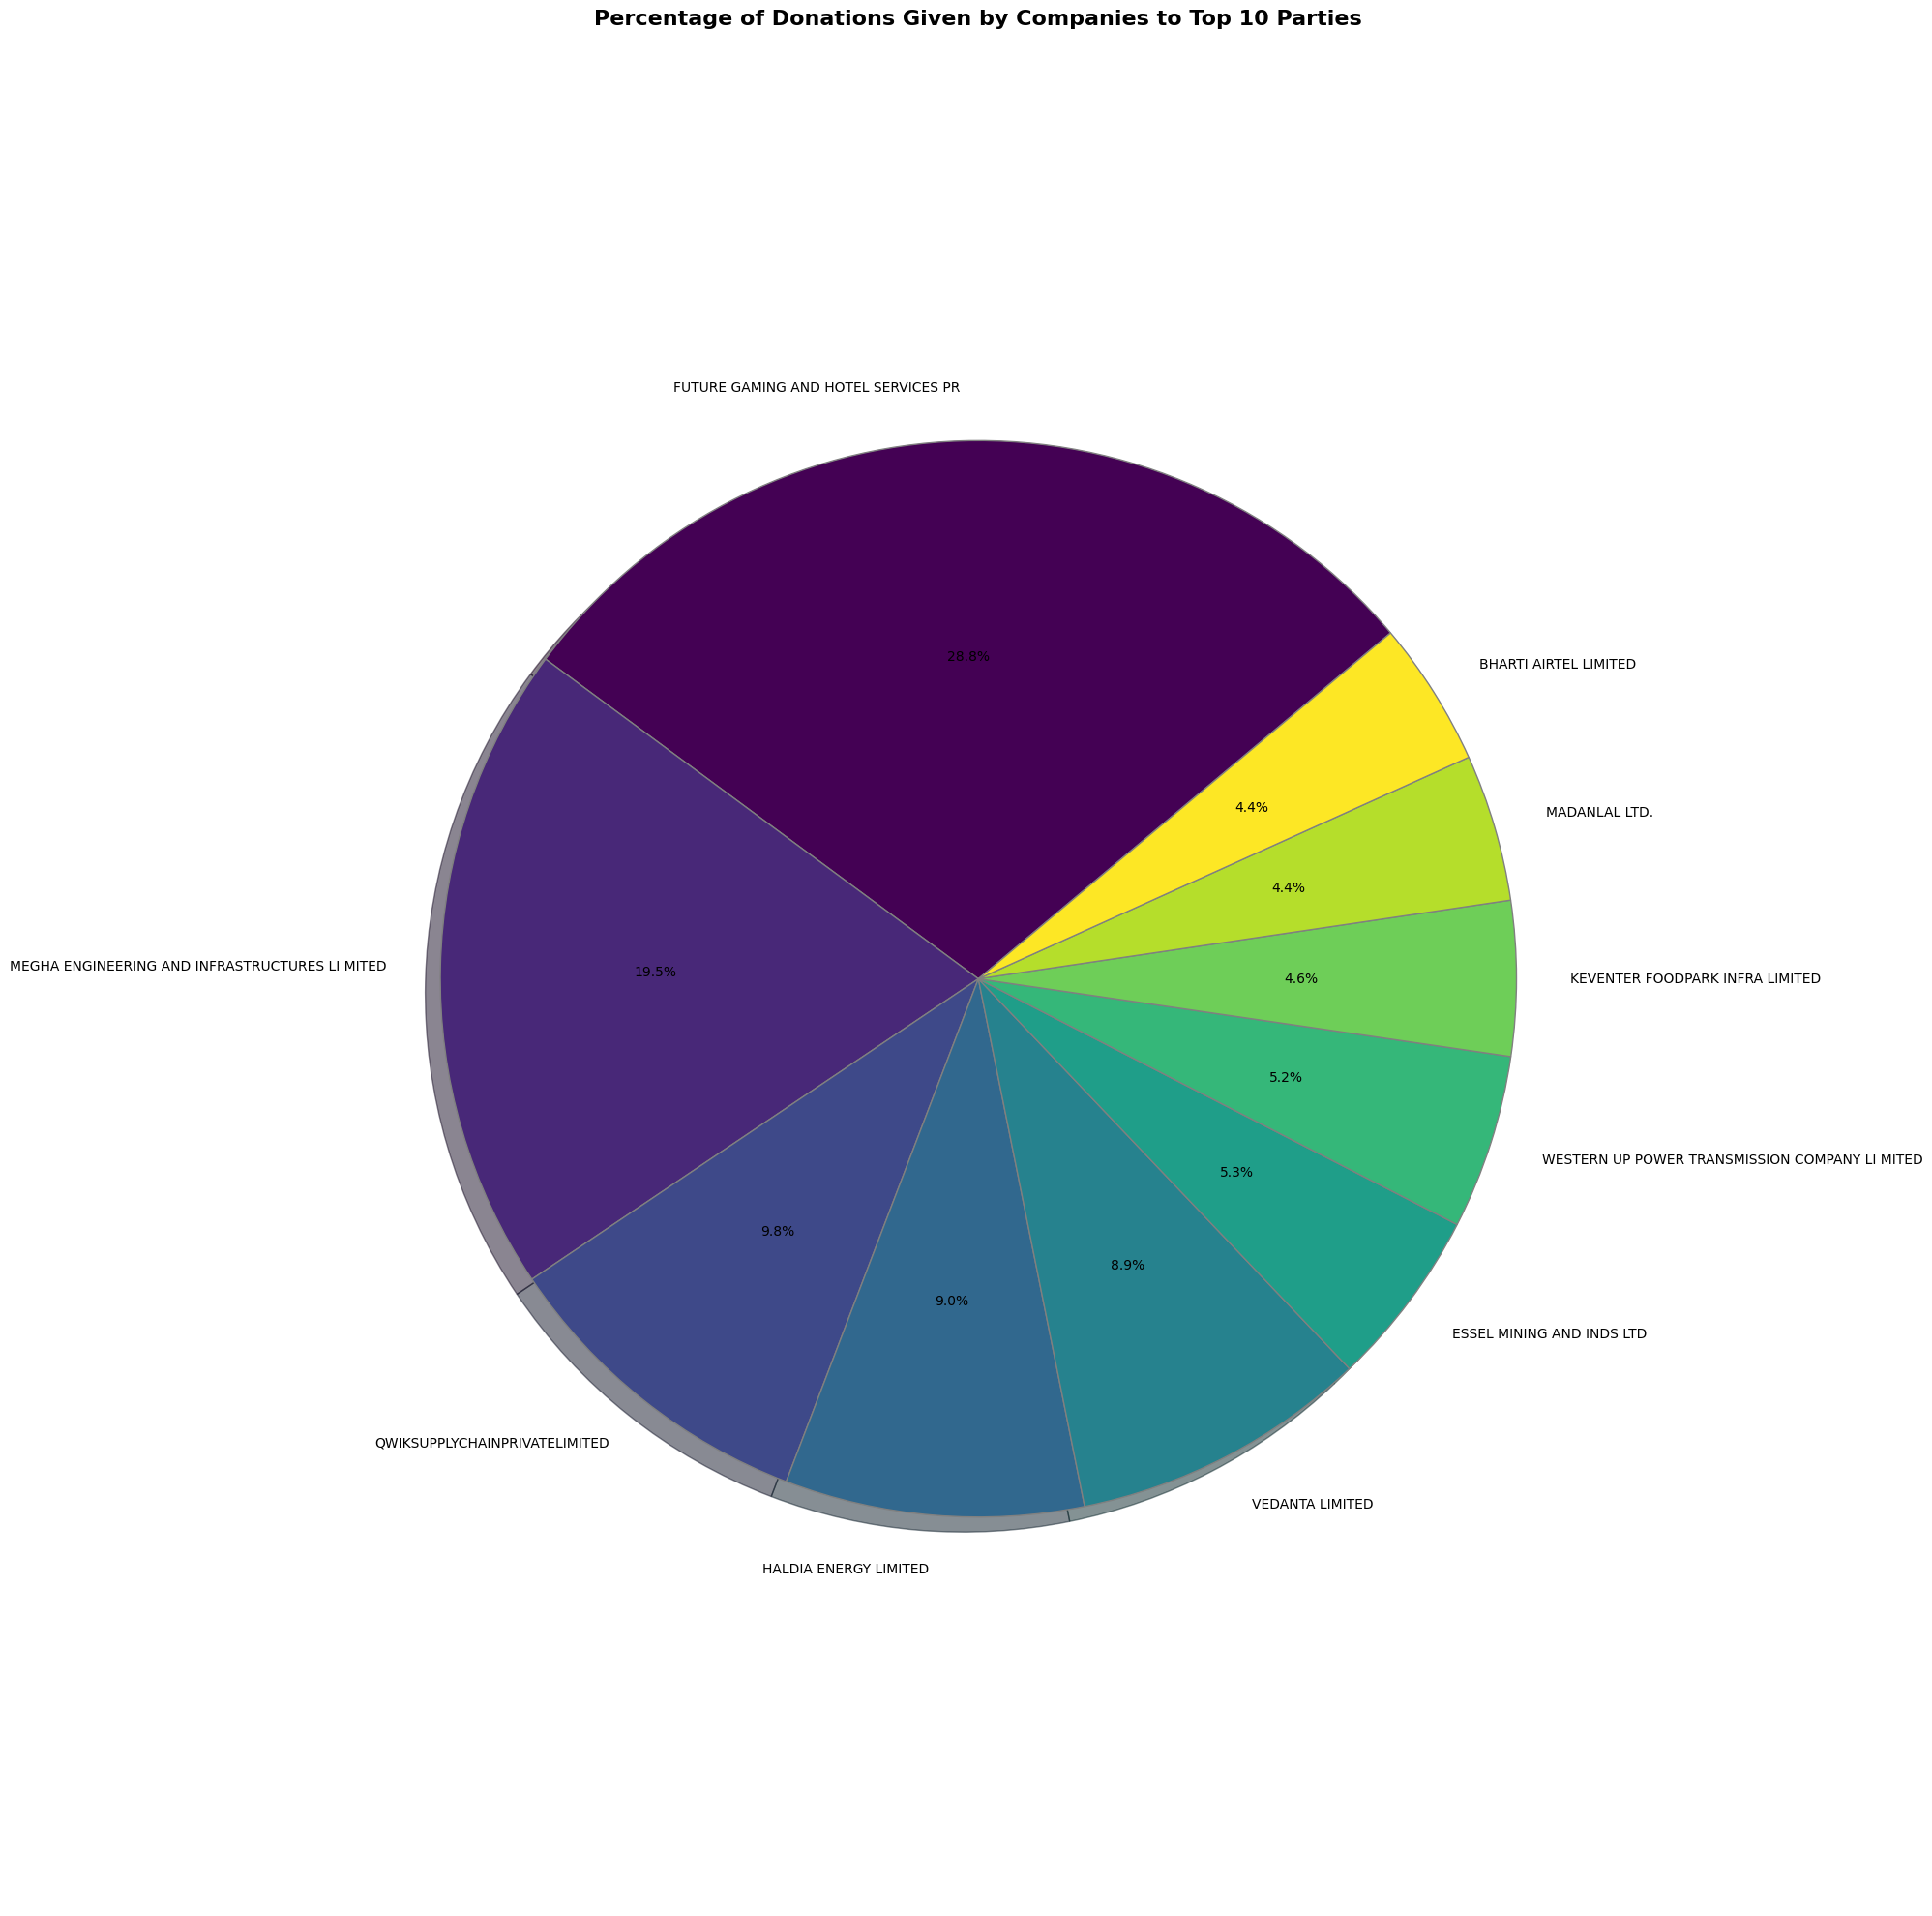

In [33]:
party_funds = buyers_total.groupby('Purchaser Name')['Denomination'].sum().reset_index()

total_amount_received = party_funds['Denomination'].sum()

party_funds['Percentage'] = (party_funds['Denomination'] / total_amount_received) * 100

party_funds = party_funds.sort_values(by = 'Percentage', ascending = False)

plt.figure(figsize=(20, 20))
party_pie = party_funds.head(10)

# Defining colors for the pie chart
colors = plt.cm.viridis(np.linspace(0, 1, len(party_pie)))

# Plotting the pie chart
plt.pie(party_pie['Denomination'], labels=party_pie['Purchaser Name'], autopct='%1.1f%%', startangle=40, 
        labeldistance=1.1, colors=colors, shadow=True, wedgeprops={'edgecolor': 'grey'})

# Adding a title with enhanced formatting
plt.title('Percentage of Donations Given by Companies to Top 10 Parties', fontsize=16, fontweight='bold', pad=20)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

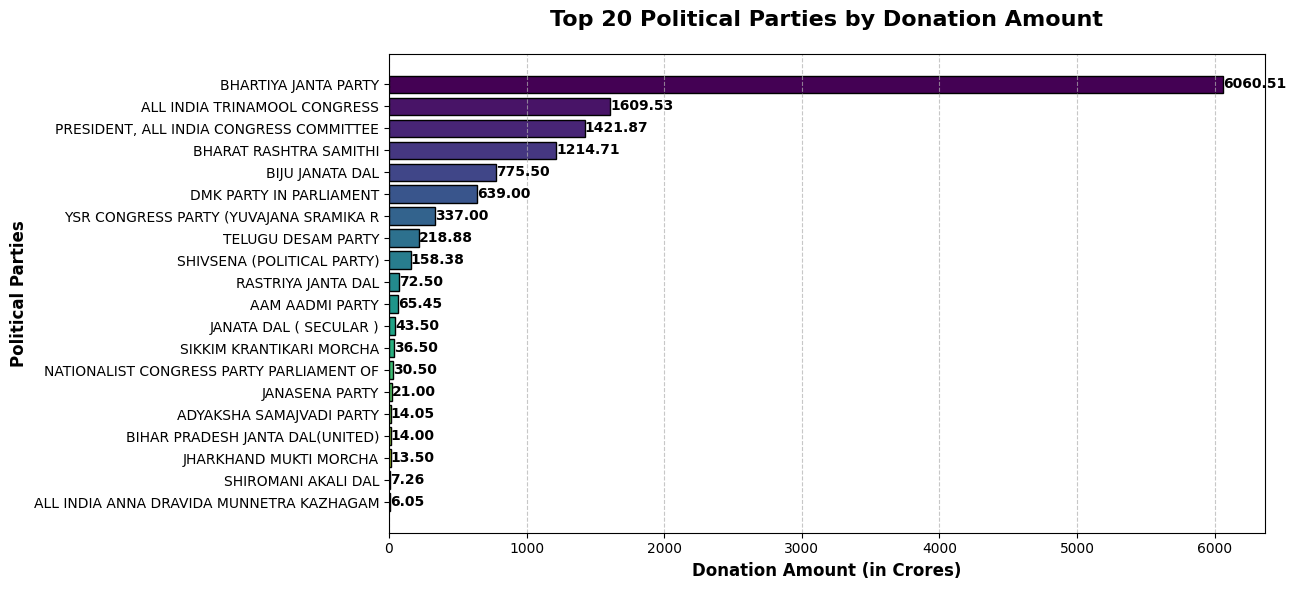

In [28]:
year_part_funds= receiver_total_money.groupby('Name of the Political Party')['Denomination'].sum().reset_index()


year_part_funds= year_part_funds.sort_values(by = 'Denomination', ascending = False)
year_part_funds['Denomination'] = year_part_funds['Denomination']/10000000 
top20 = year_part_funds.head(20)
num_colors = len(top20)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))  # Changed to 'viridis' for better readability

plt.figure(figsize=(13, 6))

barsss = plt.barh(top20['Name of the Political Party'], top20['Denomination'], color=colors, edgecolor='black')

# Adding text annotations
for bar, value in zip(barsss, top20['Denomination']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}',  # Format to 2 decimal places
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Adding title and labels with improved formatting
plt.title('Top 20 Political Parties by Donation Amount', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Donation Amount (in Crores)', fontsize=12, fontweight='bold')
plt.ylabel('Political Parties', fontsize=12, fontweight='bold')

# Adding grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Inverting the y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()

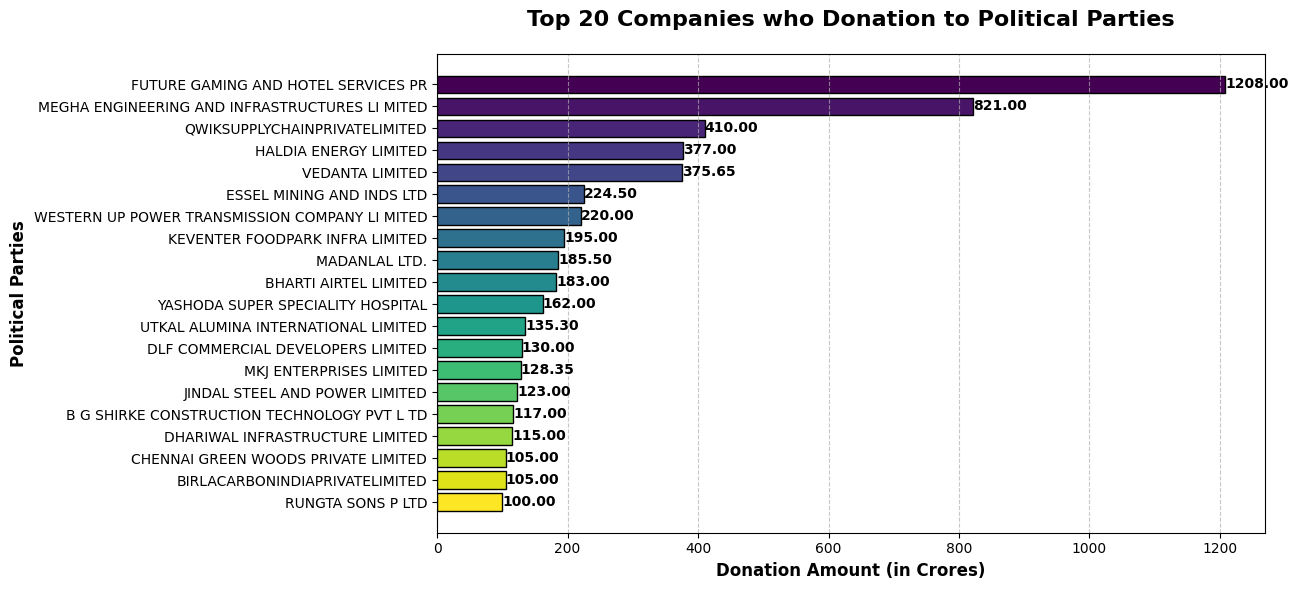

In [29]:
year_part_funds= buyers_total.groupby('Purchaser Name')['Denomination'].sum().reset_index()


year_part_funds= year_part_funds.sort_values(by = 'Denomination', ascending = False)
year_part_funds['Denomination'] = year_part_funds['Denomination']/10000000 
top20 = year_part_funds.head(20)
num_colors = len(top20)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))  # Changed to 'viridis' for better readability

plt.figure(figsize=(13, 6))

barsss = plt.barh(top20['Purchaser Name'], top20['Denomination'], color=colors, edgecolor='black')

# Adding text annotations
for bar, value in zip(barsss, top20['Denomination']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}',  # Format to 2 decimal places
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Adding title and labels with improved formatting
plt.title('Top 20 Companies who Donation to Political Parties', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Donation Amount (in Crores)', fontsize=12, fontweight='bold')
plt.ylabel('Political Parties', fontsize=12, fontweight='bold')

# Adding grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Inverting the y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()
